<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/kaperob/gini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

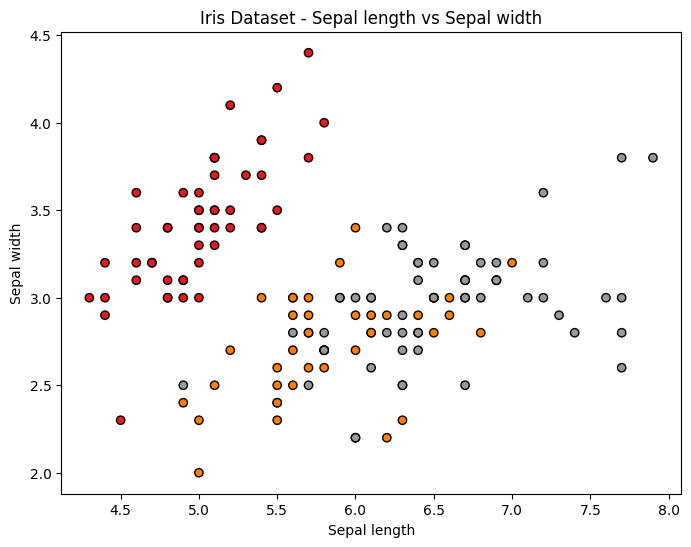

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Załaduj dane Iris
data = datasets.load_iris()
X = data.data
y = data.target

# Wizualizacja danych
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset - Sepal length vs Sepal width')
plt.show()

In [31]:
from sklearn.metrics import mutual_info_score

# Funkcja do obliczania entropii
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Podział a) petal width (cm) na poziomie 0.5
split_a = X[:, 3] <= 0.5
entropy_a = entropy(y[split_a])
entropy_not_a = entropy(y[~split_a])
info_gain_a = entropy(y) - (np.sum(split_a) / len(y) * entropy_a + np.sum(~split_a) / len(y) * entropy_not_a)

# Podział b) petal width (cm) na poziomie 0.38
split_b = X[:, 3] <= 0.38
entropy_b = entropy(y[split_b])
entropy_not_b = entropy(y[~split_b])
info_gain_b = entropy(y) - (np.sum(split_b) / len(y) * entropy_b + np.sum(~split_b) / len(y) * entropy_not_b)

print("Zysk informacyjny dla podziału a):", info_gain_a)
print("Zysk informacyjny dla podziału b):", info_gain_b)

Zysk informacyjny dla podziału a): 0.864337562184764
Zysk informacyjny dla podziału b): 0.6195148513196114


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Drzewo decyzyjne
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Dokładność drzewa decyzyjnego:", dt_accuracy)

# Las losowy
rf_classifier = RandomForestClassifier(n_estimators=15)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Dokładność lasu losowego:", rf_accuracy)


Dokładność drzewa decyzyjnego: 1.0
Dokładność lasu losowego: 1.0
